In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [15]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
target_directory = os.path.join(parent_directory, 'csv_results')
target_file = os.path.join(target_directory, 'results_yoga1_09-21-05.csv')

In [18]:
df = pd.read_csv(target_file, index_col=0)

In [29]:

from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality

target_landmarks = [0, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

In [31]:
landmark_names = {
    0: "nose",
    1: "left_eye_inner",
    2: "left_eye",
    3: "left_eye_outer",
    4: "right_eye_inner",
    5: "right_eye",
    6: "right_eye_outer",
    7: "left_ear",
    8: "right_ear",
    9: "mouth_left",
    10: "mouth_right",
    11: "left_shoulder",
    12: "right_shoulder",
    13: "left_elbow",
    14: "right_elbow",
    15: "left_wrist",
    16: "right_wrist",
    17: "left_pinky",
    18: "right_pinky",
    19: "left_index",
    20: "right_index",
    21: "left_thumb",
    22: "right_thumb",
    23: "left_hip",
    24: "right_hip",
    25: "left_knee",
    26: "right_knee",
    27: "left_ankle",
    28: "right_ankle",
    29: "left_heel",
    30: "right_heel",
    31: "left_foot_index",
    32: "right_foot_index"
}

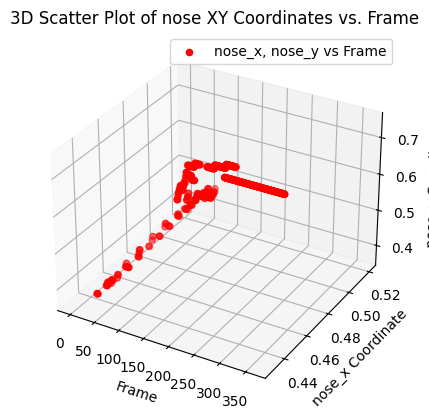

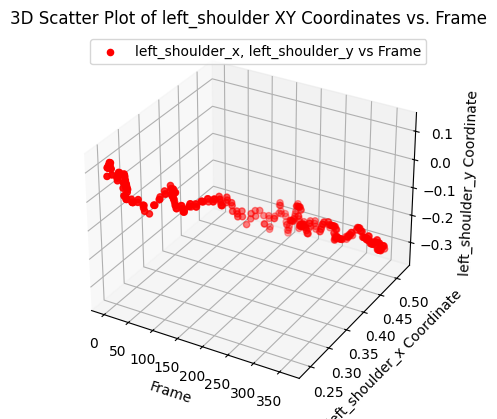

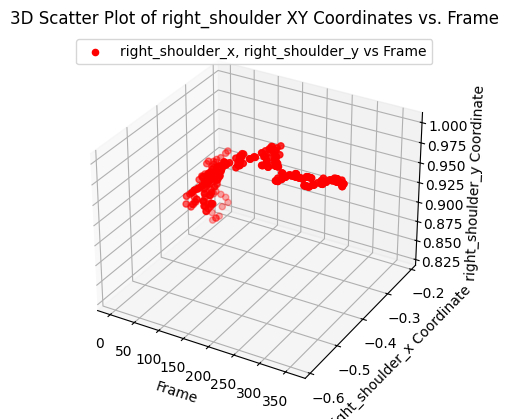

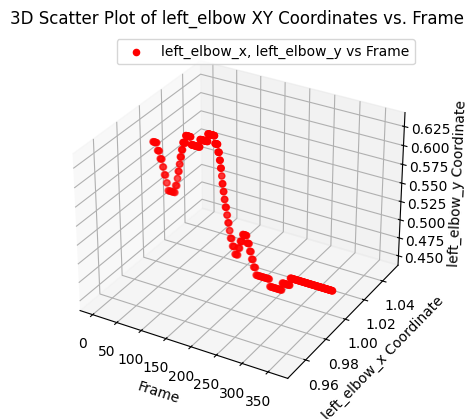

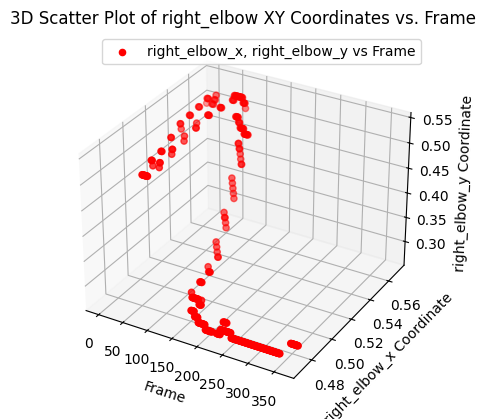

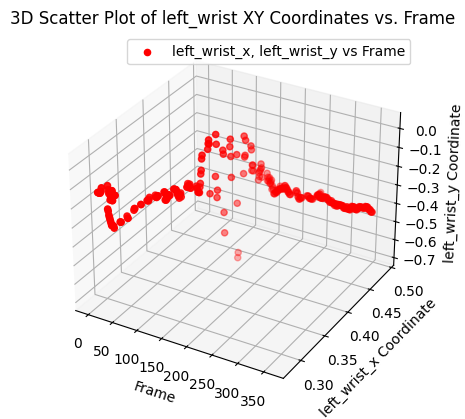

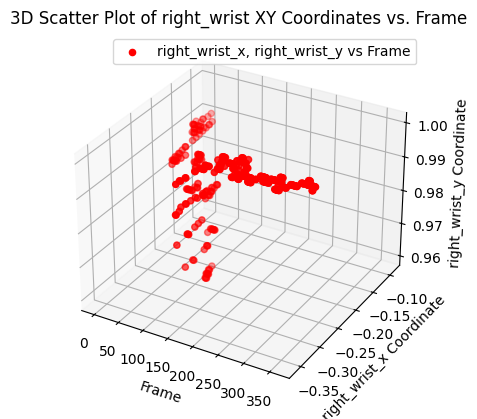

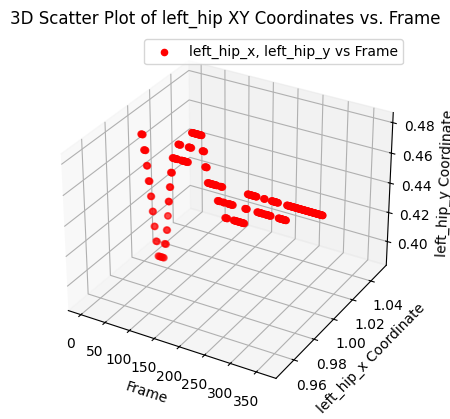

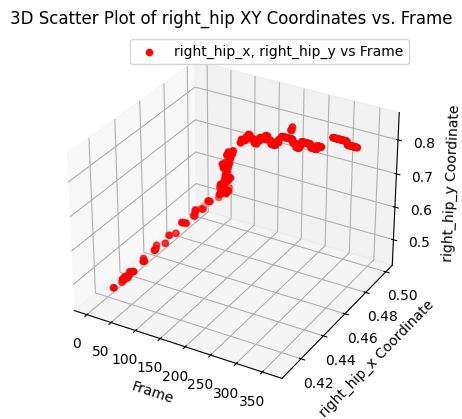

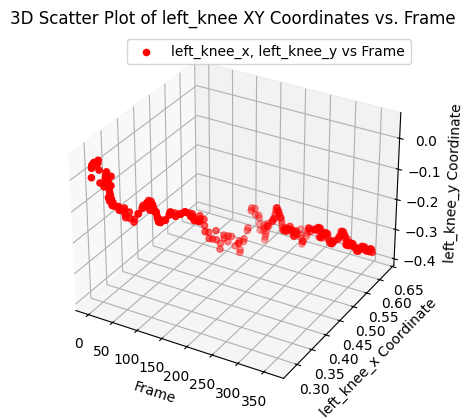

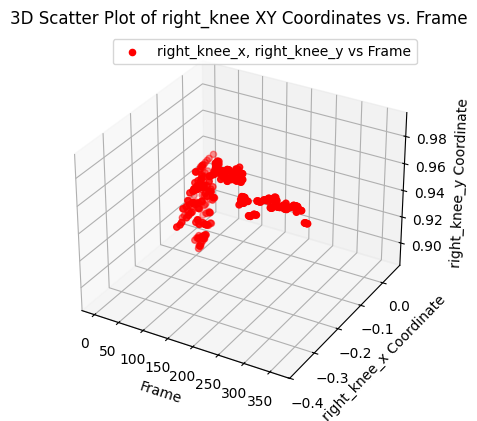

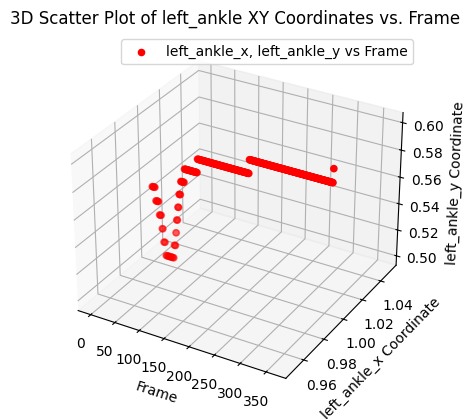

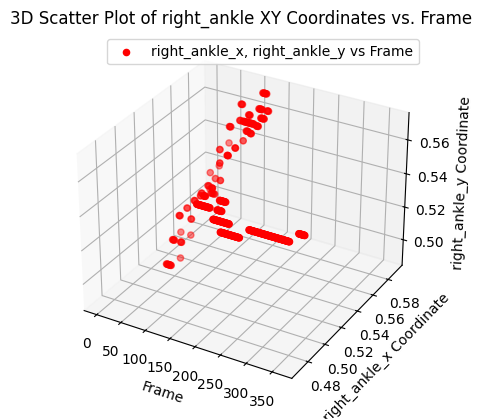

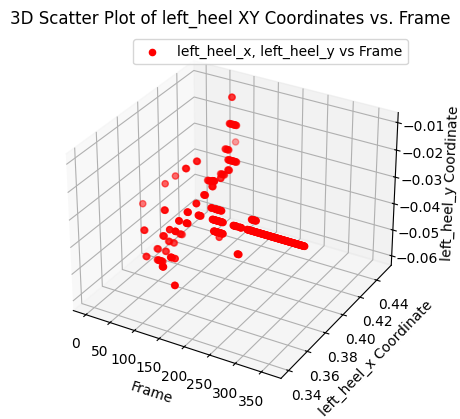

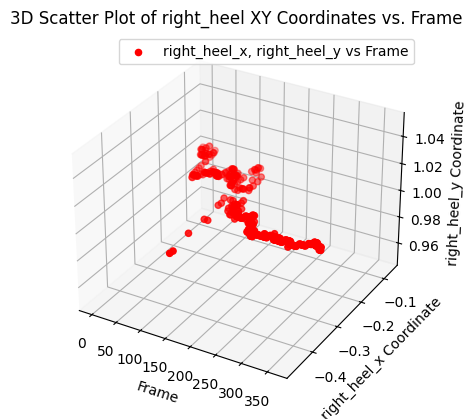

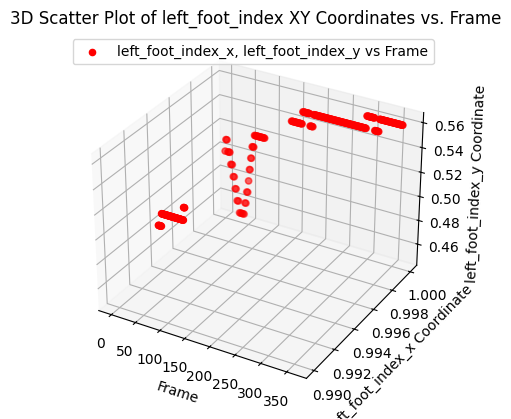

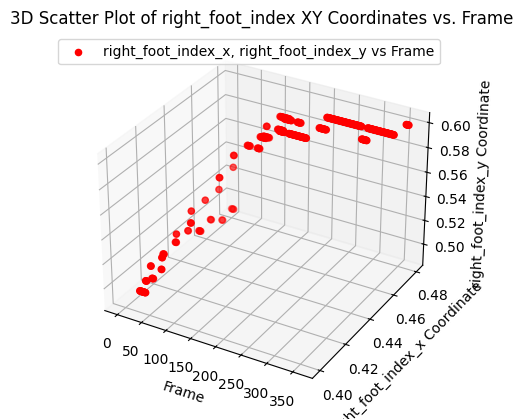

In [36]:
for landmark_id in target_landmarks:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get column names for x and y coordinates of the current landmark
    x_col = f'L{landmark_id}_x'
    y_col = f'L{landmark_id}_y'

    # Plot x and y coordinates against the index (Frame)
    ax.scatter(df.index, df[x_col], df[y_col], c='r', marker='o', label=f'{landmark_names[landmark_id]}_x, {landmark_names[landmark_id]}_y vs Frame')

    # Set labels and title
    ax.set_xlabel('Frame')
    ax.set_ylabel(f'{landmark_names[landmark_id]}_x Coordinate')
    ax.set_zlabel(f'{landmark_names[landmark_id]}_y Coordinate')
    plt.title(f'3D Scatter Plot of {landmark_names[landmark_id]} XY Coordinates vs. Frame')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

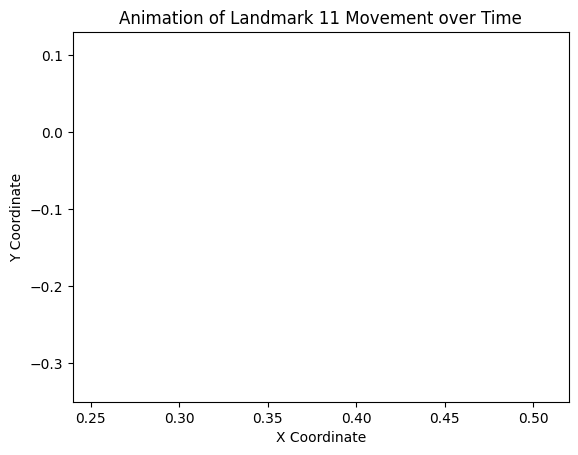

In [39]:
from matplotlib.animation import FuncAnimation
# Select the landmark ID for which you want to create the animation
landmark_id = 11  # Example landmark ID

# Get column names for x and y coordinates of the selected landmark
x_col = f'L{landmark_id}_x'
y_col = f'L{landmark_id}_y'

# Extract x and y coordinates over time for the selected landmark
x = df[x_col].values
y = df[y_col].values

fig, ax = plt.subplots()
point, = ax.plot([], [], 'go')

def init():
    ax.set_xlim(min(x), max(x))  # Adjust the limits based on your data
    ax.set_ylim(min(y), max(y))  # Adjust the limits based on your data
    return point,

def update(frame):
    point.set_data(x[:frame], y[:frame])
    return point,

ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Animation of Landmark {landmark_id} Movement over Time')
plt.show()